In [1]:
using Gadfly, RDatasets

┌ Info: Precompiling Gadfly [c91e804a-d5a3-530f-b6f0-dfbca275c004]
└ @ Base loading.jl:1278
┌ Info: Precompiling RDatasets [ce6b1742-4840-55fa-b093-852dadbb1d8b]
└ @ Base loading.jl:1278


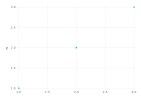

In [2]:
plot(y=[1,2,3])

In [3]:
iris = dataset("datasets", "iris")

150×5 DataFrame
 Row │ SepalLength  SepalWidth  PetalLength  PetalWidth  Species   
     │ Float64      Float64     Float64      Float64     Cat…      
─────┼─────────────────────────────────────────────────────────────
   1 │         5.1         3.5          1.4         0.2  setosa
   2 │         4.9         3.0          1.4         0.2  setosa
   3 │         4.7         3.2          1.3         0.2  setosa
   4 │         4.6         3.1          1.5         0.2  setosa
   5 │         5.0         3.6          1.4         0.2  setosa
   6 │         5.4         3.9          1.7         0.4  setosa
   7 │         4.6         3.4          1.4         0.3  setosa
   8 │         5.0         3.4          1.5         0.2  setosa
   9 │         4.4         2.9          1.4         0.2  setosa
  10 │         4.9         3.1          1.5         0.1  setosa
  11 │         5.4         3.7          1.5         0.2  setosa
  ⋮  │      ⋮           ⋮            ⋮           ⋮           ⋮
 141 │         6.7         3.1          5.6         2.4  virginica
 142 │         6.9         3.1          5.1         2.3  virginica
 143 │         5.8         2.7          5.1         1.9  virginica
 144 │         6.8         3.2          5.9         2.3  virginica
 145 │         6.7         3.3          5.7         2.5  virginica
 146 │         6.7         3.0          5.2         2.3  virginica
 147 │         6.3         2.5          5.0         1.9  virginica
 148 │         6.5         3.0          5.2         2.0  virginica
 149 │         6.2         3.4          5.4         2.3  virginica
 150 │         5.9         3.0          5.1         1.8  virginica
                                                   129 rows omitted

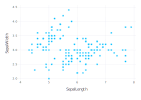

In [4]:
p = plot(iris, x=:SepalLength, y=:SepalWidth, Geom.point);
p

In [5]:
img = SVG("002_plot_iris1.svg", 14cm, 8cm)
draw(img, p)

false

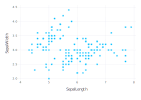

In [6]:
plot(iris, x=:SepalLength, y=:SepalWidth)

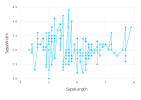

In [7]:
plot(iris, x=:SepalLength, y=:SepalWidth, Geom.point, Geom.line)

In [8]:
SepalLength = iris.SepalLength
SepalWidth = iris.SepalWidth

150-element Array{Float64,1}:
 3.5
 3.0
 3.2
 3.1
 3.6
 3.9
 3.4
 3.4
 2.9
 3.1
 3.7
 3.4
 3.0
 ⋮
 3.0
 3.1
 3.1
 3.1
 2.7
 3.2
 3.3
 3.0
 2.5
 3.0
 3.4
 3.0

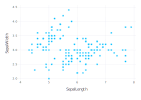

In [9]:
plot(x=SepalLength, y=SepalWidth, Geom.point,
     Guide.xlabel("SepalLength"), Guide.ylabel("SepalWidth"))

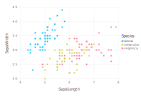

In [10]:
plot(iris, x=:SepalLength, y=:SepalWidth, color=:Species, Geom.point)

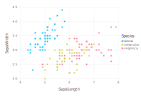

In [11]:
Color = iris.Species
plot(x=SepalLength, y=SepalWidth, color=Color, Geom.point,
     Guide.xlabel("SepalLength"), Guide.ylabel("SepalWidth"),
     Guide.colorkey(title="Species"))

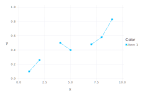

In [12]:
y1 = [0.1, 0.26, NaN, 0.5, 0.4, NaN, 0.48, 0.58, 0.83]
plot(x=1:9, y=y1, Geom.line, Geom.point,
        color=["Item 1"], linestyle=[:dash], size=[3pt],
)

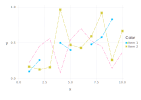

In [13]:
y1 = [0.1, 0.26, NaN, 0.5, 0.4, NaN, 0.48, 0.58, 0.83]
plot(x=1:9, y=y1, Geom.line, Geom.point,
        color=["Item 1"], linestyle=[:dash], size=[3pt],
    layer(x=1:10, y=rand(10), Geom.line, Geom.point,
        color=["Item 2"], size=[5pt], shape=[Shape.square]),
    layer(x=1:10, y=rand(10), color=[colorant"hotpink"],
        linestyle=[[8pt, 3pt, 2pt, 3pt]], Geom.line)
)

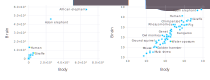

In [14]:
set_default_plot_size(21cm ,8cm)
mammals = dataset("MASS", "mammals")
p1 = plot(mammals, x=:Body, y=:Brain, label=:Mammal, Geom.point, Geom.label)
p2 = plot(mammals, x=:Body, y=:Brain, label=:Mammal, Geom.point, Geom.label,
     Scale.x_log10, Scale.y_log10)
hstack(p1, p2)

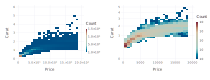

In [15]:
using Printf
Diamonds = dataset("ggplot2","diamonds")
p3= plot(Diamonds, x=:Price, y=:Carat, Geom.histogram2d(xbincount=25, ybincount=25),
    Scale.x_continuous(format=:engineering) )
p4= plot(Diamonds, x=:Price, y=:Carat, Geom.histogram2d(xbincount=25, ybincount=25),
    Scale.x_continuous(format=:plain),
    Scale.y_sqrt(labels=y->@sprintf("%i", y^2)),
    Scale.color_log10(minvalue=1.0, maxvalue=10^4),
    Guide.yticks(ticks=sqrt.(0:5)) )
hstack(p3, p4)

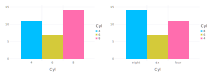

In [16]:
mtcars = dataset("datasets","mtcars")
 labeldict = Dict(4=>"four", 6=>"six", 8=>"eight")
p5 = plot(mtcars, x=:Cyl, color=:Cyl, Geom.histogram,
    Scale.x_discrete(levels=[4,6,8]), Scale.color_discrete(levels=[4,6,8]) )
p6 = plot(mtcars, x=:Cyl, color=:Cyl, Geom.histogram,
    Scale.x_discrete(labels=i->labeldict[i], levels=[8,6,4]),
    Scale.color_discrete(levels=[8,6,4]) )
hstack(p5, p6)

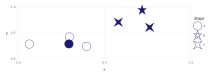

In [17]:
x, y = 0.55*rand(4), 0.55*rand(4)
plot( Coord.cartesian(xmin=0, ymin=0, xmax=1.0, ymax=1.0),
    layer(x=x, y=y, shape=["A"], alpha=["day","day","day","night"]),
    layer(x=1.0.-y[1:3], y=1.0.-x[1:3], shape=["B", "C","C"], alpha=["night"]),
    Scale.shape_discrete(levels=["A","B","C"]),
    Scale.alpha_discrete(levels=["day","night"]),
    Theme(discrete_highlight_color=identity, point_size=12pt,
   point_shapes=[Shape.circle, Shape.star1, Shape.star2], alphas=[0, 1.0],
         default_color="midnightblue" )
)

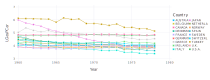

In [18]:
gasoline = dataset("Ecdat", "Gasoline")
plot(gasoline, x=:Year, y=:LGasPCar, color=:Country, Geom.point, Geom.line)

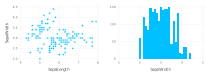

In [19]:
fig1a = plot(iris, x=:SepalLength, y=:SepalWidth, Geom.point)
fig1b = plot(iris, x=:SepalWidth, Geom.bar)
fig1 = hstack(fig1a, fig1b)

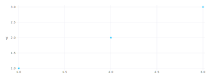

In [20]:
g = Gadfly
p = g.plot(y=[1,2,3])